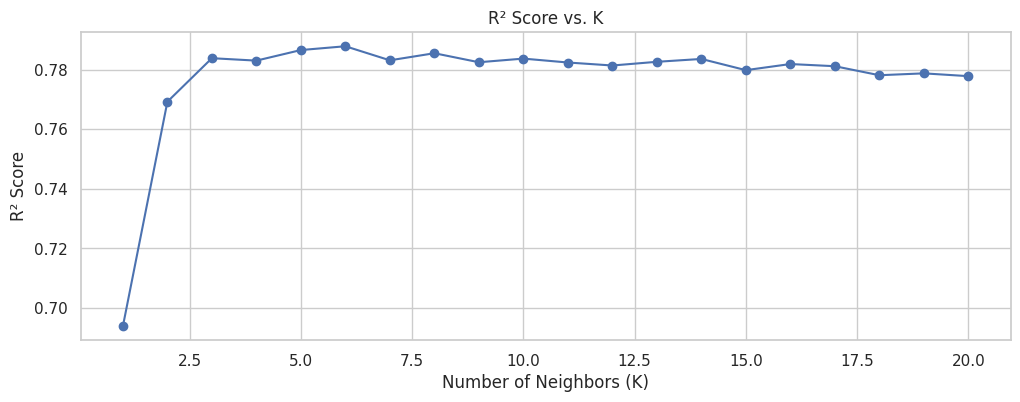

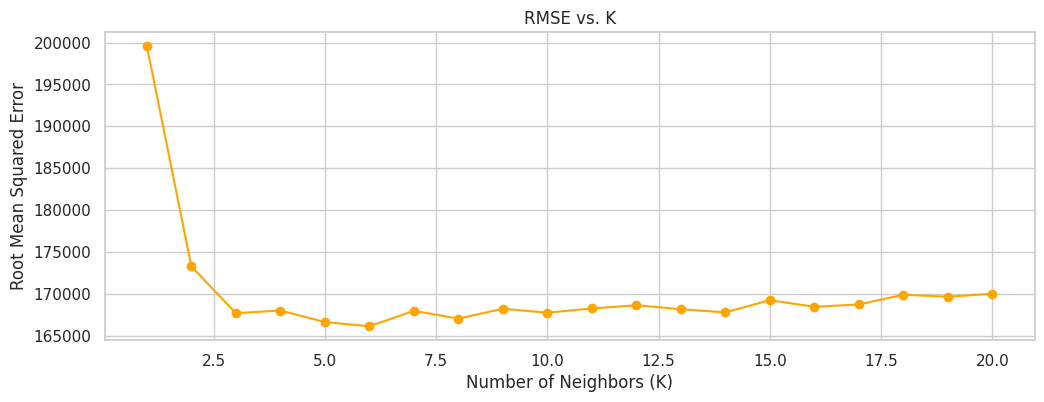


✅ Best K: 6 with R² = 0.788
📉 Final RMSE: 166118.15
📊 Final R²: 0.788


In [1]:
# 📦 Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📋 Configuration
sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 📥 Load data
df = pd.read_csv("/content/kc_house_data.csv")

# 🧼 Cleaning
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# 🎯 Target and features
X = df.drop(columns='price')
y = df['price']

# 🎛️ Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📏 Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Train KNN for different values of k
r2_scores = []
rmse_scores = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# 📈 Plot performance
plt.figure(figsize=(12,4))
plt.plot(k_range, r2_scores, marker='o')
plt.title("R² Score vs. K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(k_range, rmse_scores, marker='o', color='orange')
plt.title("RMSE vs. K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.show()

# ✅ Best model
best_k = k_range[np.argmax(r2_scores)]
print(f"\n✅ Best K: {best_k} with R² = {max(r2_scores):.3f}")

final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)
y_final = final_model.predict(X_test_scaled)

# 📊 Final results
print(f"📉 Final RMSE: {np.sqrt(mean_squared_error(y_test, y_final)):.2f}")
print(f"📊 Final R²: {r2_score(y_test, y_final):.3f}")
